In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [190]:
n_dims = 1


x = np.linspace(0, 10, num=10)
y = np.ones_like(x)*2

In [280]:
class Lin_cost_func(object):
    """Linear cost function and its derivative"""
    def __init__(self, x,y):
        self.x, self.y = x,y
        
    def __call__(self, f):
        return 1/2.*np.mean( [(f(_x) - _y)**2 for _x,_y in zip(x,y) ] )
    
    def part_der(self, f, params):
        return np.mean( [ f(_x) - _y for _x,_y in zip(x,y)]) * params

    
class Linear_func(object):
    """Linear function for regression"""
    def __init__(self, n_d = n_dims):
        self.params = np.random.uniform(size = n_d+1)
        
    def __call__(self, x):
        return np.dot(self.params[1:], x) + self.params[0]
    
    def fit(self, x, y, lrn_rate = 1e-5, max_iter = 10, fin_accuracy = 1e-5):
        """method for fitting data with gradient descent"""
        x_ = np.insert(x,0,1)
        #change it
        cost_f = Lin_cost_func(x_,y)
        
        for i in xrange(max_iter):
            if not (i %1): print self.params
            self.params -= lrn_rate * cost_f.part_der(self, self.params)
            if cost_f(self) < fin_accuracy: 
                print "Aligned"
                break
                
linear_f = lambda p0, p1, x: p1*x+p0

In [272]:
f1 = Linear_func(1)


In [273]:
res = [f1(z) for z in x]

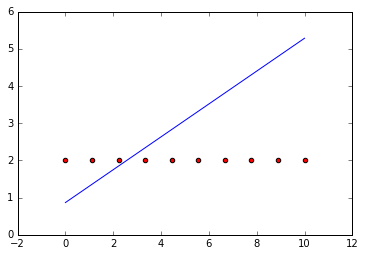

In [274]:
plt.scatter(x,y,c='r')
plt.plot(x,res)

In [275]:
a0 = f1.params.copy()
print f1.params
print '_______________________________'
f1.fit(x,y, lrn_rate=0.001, max_iter=10)
print '_______________________________'
print f1.params

[ 0.86660347  0.44176622]
_______________________________
[ 0.86660347  0.44176622]
[ 0.8656715   0.44129113]
[ 0.86474339  0.44081801]
[ 0.86381912  0.44034684]
[ 0.86289868  0.43987763]
[ 0.86198203  0.43941036]
[ 0.86106916  0.43894501]
[ 0.86016005  0.43848157]
[ 0.85925467  0.43802004]
[ 0.85835301  0.4375604 ]
_______________________________
[ 0.85745504  0.43710264]


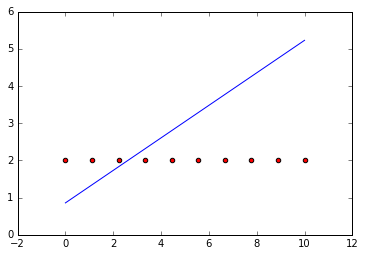

In [276]:
res = [f1(z) for z in x]
plt.scatter(x,y,c='r')
plt.plot(x,res)

In [254]:
f1.params = np.array([1.7,0.5])

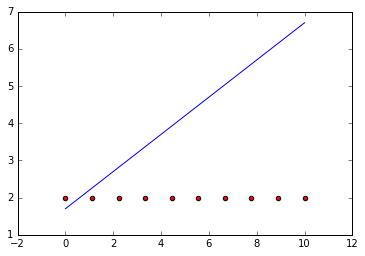

In [255]:
res = [f1(z) for z in x]
plt.scatter(x,y,c='r')

plt.plot(x,res)

In [322]:
resolution = 100
o_x = o_y = np.linspace(-5,5, num=resolution)
X, Y = np.meshgrid(o_x, o_y)

Z = np.array([Lin_cost_func(x,y)(lambda z: linear_f(p0,p1,z)) for p0,p1 in zip(X,Y)]).reshape(o_x.size,o_y.size)

ValueError: total size of new array must be unchanged

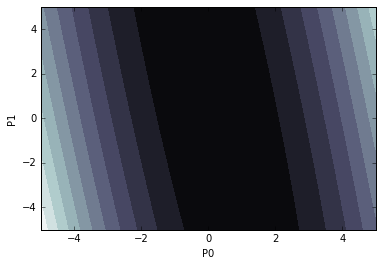

In [320]:
nr, nc = Z.shape

# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.
CS = plt.contourf(,X Y, Z, 10,
                  #[-1, -0.1, 0, 0.1],
                  #alpha=0.5,
                  cmap=plt.cm.bone,
                  origin='lower')
plt.xlabel('P0')
plt.ylabel('P1')

In [325]:
X

array([[-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       ..., 
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ],
       [-5.       , -4.8989899, -4.7979798, ...,  4.7979798,  4.8989899,
         5.       ]])